# Replicating 'Delivering Education to the Underserved through a Public-Private Partnership Program in Pakistan: A Randomized Controlled Study'



 This notebook contains the replication of
> Barrera-Osorio,Felipe & Blakeslee,David S.& Hoover, Matthew & Linden ,Leigh & Raju, Dhushyanth & Ryan ,Stephen P. , 2017. "Delivering education to the underserved through a public-private partnership program in Pakistan," Policy Research Working Paper Series 8177, The World Bank.

**Sources used to replicate the study can be found here : [code,data](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/UWXULC) and [paper](http://documents1.worldbank.org/curated/en/868011504015520701/pdf/WPS8177.pdf).**

**Information about navigating the notebook:**

* The notebook attempts to replicate the major results of the study. Tables and figures are labelled accordingly.
* I also add additional visualizations as seen fit to improve on the readability and lucidity of the study.
* Having originated from South Asia,I am also uniquely placed to enrich the paper with personal observations and interpretations of the results. They are accordingly marked.


## Table of Contents
* [Introduction](#first-bullet)
* [Second Bullet Header](#second-bullet)



In [10]:

options(warn=-1) #options(warn=0) to turn warnings back on

library(tidyverse)
library(haven)
library(dplyr)
library(sandwich)
library(stargazer)
library(stargazer)
library(IRdisplay)
library(magrittr)
library(xtable)
library(broom)
library(kableExtra)



#install.packages("patchwork")
library(patchwork)


#install.packages("ggthemes")
library(ggthemes)


package 'Cairo' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abrah\AppData\Local\Temp\RtmpErqvM1\downloaded_packages


**Importing Data**

In [17]:
child_data<- read_dta("data/ReStat_children.dta")
school_data<- read_dta("data/ReStat_schools.dta")

**Importing Functions to plot tables**

In [3]:
source("auxiliary/Table_functions.r")

Figure 1

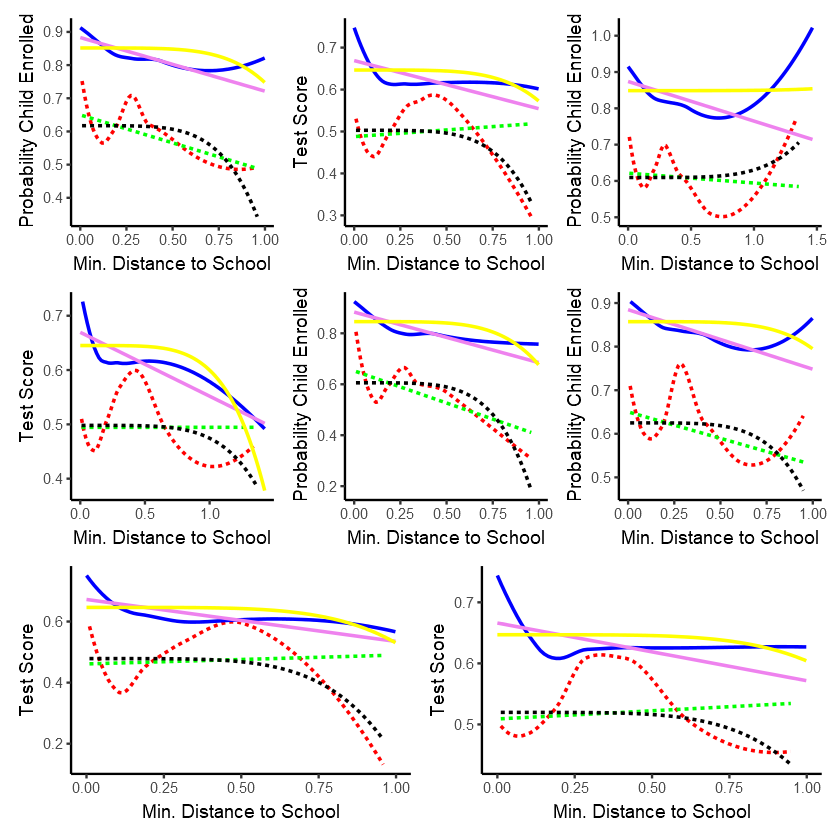

In [18]:

poly_plot<-function(data,x,y) {
    
school_data_subset_control<-data %>% filter(fu_child_level == 1 & fu_young_child == 1 & pooled_treatment==0) 
school_data_subset_treat<-  data %>% filter(fu_child_level == 1 & fu_young_child == 1 & pooled_treatment==1)
size=0.75
    
ggplot(NULL,aes_string(x=x , y=y))+ theme_classic()+
           geom_smooth(data=school_data_subset_control,method = "loess", formula = y ~ poly(x) ,se=FALSE,size = size, col = "red",bw=0.15,linetype="dashed") + 
           geom_smooth(data=school_data_subset_treat,method = "loess", formula = y ~ poly(x), size =size, se=FALSE, col = "blue",bw=0.15) +
           geom_smooth(data=school_data_subset_control,method = "lm", formula = y ~ x ,se=FALSE,size = size, col = "green",bw=0.15,linetype="dashed") + 
           geom_smooth(data=school_data_subset_treat,method =  "lm", formula = y ~ x, size = size, se=FALSE, col = "violet",bw=0.15) +
             geom_smooth(data=school_data_subset_control,method = "lm", formula = y ~ poly(x^5) ,se=FALSE,size = size, col = "black",bw=0.15,linetype="dashed") + 
           geom_smooth(data=school_data_subset_treat,method =  "lm", formula = y ~ poly(x^5), size = size, se=FALSE, col = "yellow",bw=0.15) 
           
}




m1<-school_data %>% filter(min_school_dist_sef < 1)  %>% poly_plot(.,"min_school_dist_sef","fu_child_enrolled")  + labs(x ="Min. Distance to School",y= "Probability Child Enrolled")
m2<-school_data %>% filter(min_school_dist_sef < 1)  %>% poly_plot(.,"min_school_dist_sef","total_score_pct") + labs(x ="Min. Distance to School",y= "Test Score")
m3<-school_data %>% filter(min_school_dist_sef < 1.5)  %>% poly_plot(.,"min_school_dist_sef","fu_child_enrolled")  + labs(x ="Min. Distance to School",y= "Probability Child Enrolled")
m4<-school_data %>% filter(min_school_dist_sef < 1.5)  %>% poly_plot(.,"min_school_dist_sef","total_score_pct")+ labs(x ="Min. Distance to School",y= "Test Score")
m5<-school_data %>% filter( min_school_dist_sef < 1 & fu_female == 1)  %>% poly_plot(.,"min_school_dist_sef","fu_child_enrolled") + labs(x ="Min. Distance to School",y= "Probability Child Enrolled")
m6<-school_data %>% filter( min_school_dist_sef < 1 & fu_female == 0)  %>% poly_plot(.,"min_school_dist_sef","fu_child_enrolled") + labs(x ="Min. Distance to School",y= "Probability Child Enrolled")
m7<-school_data %>% filter( min_school_dist_sef < 1 & fu_female == 1)  %>% poly_plot(.,"min_school_dist_sef","total_score_pct")+ labs(x ="Min. Distance to School",y= "Test Score")
m8<-school_data %>% filter( min_school_dist_sef < 1 & fu_female == 0)  %>% poly_plot(.,"min_school_dist_sef","total_score_pct")+ labs(x ="Min. Distance to School",y= "Test Score")

figure_1.1<-(m1 |m2 |m3)/(m4| m5|m6)/ (m7|m8)


print(figure_1.1)


Figure 2:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


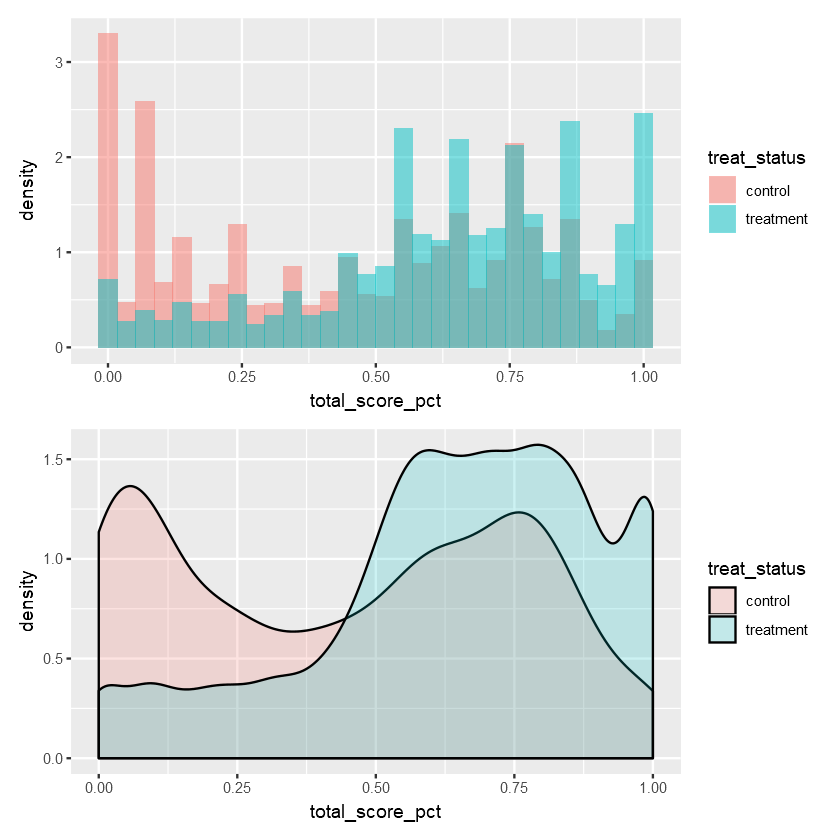

In [22]:

total_score_pct_cntrl <- school_data %>% filter(fu_child_level == 1 & fu_young_child == 1 & pooled_treatment==0 ) %>%
                           select (total_score_pct)
                           

total_score_pct_treat<- school_data %>% filter(fu_child_level == 1 & fu_young_child == 1 & pooled_treatment==1  )%>% select (total_score_pct)

combdat <- dplyr::bind_rows(list(control=total_score_pct_cntrl,treatment=total_score_pct_treat),
                           .id="treat_status")
library(ggplot2)

f_1<-ggplot(combdat, aes(total_score_pct, fill =treat_status )) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity')


f_2 <-ggplot(combdat, aes(total_score_pct, fill =treat_status )) + geom_density(alpha = 0.2)



print(f_1/f_2)


**Table 1**

In [4]:
Table_1(child_data)
#results match stata code but not data in paper

Number of:,Control,Pooled Treat.,Gender Uniform Treat.,Gender Differentiated Treat.,Total
Villages,38,161,82,79,199
Baseline Households,1451,6634,3532,3102,24962
Young Children,4567,20395,11036,9359,8085
Households,1069,4857,2554,2303,5926
Young children,3121,14647,7669,6978,17768


In [ ]:
**Table 7

In [5]:
Table_7(child_data)

Characteristics,Control,Treatment - Control,Female,Treatment,Treatment x Female
Civil Servant,0.123,0.006,-0.066 ***,0.014,-0.01
Doctor,0.109,0.055 ***,-0.031 .,0.067 ***,-0.024
Private Enterprise,0.013,0.003,-0.012 *,-0.001,0.009
Engineer,0.008,0.022 ***,0.002,0.029 ***,-0.016 *
Farmer,0.053,-0.038 ***,-0.077 ***,-0.063 ***,0.061 ***
Housewife,0.132,-0.055 ***,0.259 ***,-0.009,-0.121 ***
Laborer,0.011,-0.003,-0.006,-0.002,-0.002
Landlord,0.007,0.001,-0.008 *,0,0.002
Police/army/security,0.095,-0.015 *,-0.119 ***,-0.021 *,0.02
Teacher,0.28,0.058 ***,0.098 ***,0.028 .,0.056 *


**Table 2 Evaluation Sample Sizes**

In [6]:


                                                 
            
Table_2(child_data)


Characteristics,Baseline Control,Baseline Treatment - Control,Followup Control,Followup Treatment - Control
Child age,6.898,-0.084,7.354,0.081 *
Female,0.366,0.058,0.424,0.03 *
Child in School,0.233,0.029,0.284,-0.027
Child of hh head,9.749,-0.673,0.856,0.022 **
Household size,3.068,-0.293,7.221,-0.097
Number of Children,2.665,0.190,4.755,-0.14 **
Household head education,0.709,-0.010,2.631,0.127
Household head farmer,,,0.562,-0.016
Total land,,,4.229,0.898
Pukka house,,,0.056,-0.004


**Table 8 Characteristics by School Type**

In [7]:

Table_8(school_data)

Characteristics,Program Schools,Program - Govt. Schools,Program - Pvt. Schools
Days operational,5.118,0.515,0.342
Open admission,0.859,-0.024,-0.072
Uniform required,0.024,0.024,-0.315
Tuition required,0.000,0.000,-0.443
Medium:Sindhi,0.613,-0.370,-0.024
Medium:English,0.309,0.309,-0.054
Total Teachers,3.781,0.940,-2.541
Female Teachers,1.988,1.451,-3.439
Post secondary,1.890,-0.454,-1.499
<5 yrs Experience,3.132,2.478,0.940


**Table 4 Test Scores**

In [8]:
Table_4(child_data)

, Program Impacts on Test Scores , Dependent variable: , , Math Score Urdu Score Total Score , (1) (2) (3) (4) (1) (2) (3) (4) (1) (2) (3) (4) , Pooled Treatment 0.532 *** 0.522 *** 0.521 *** 0.627 *** 0.503 *** 0.494 *** 0.492 *** 0.591 *** 0.537 *** 0.527 *** 0.525 *** 0.631 *** , (0.027) (0.027) (0.027) (0.024) (0.026) (0.026) (0.026) (0.023) (0.026) (0.026) (0.026) (0.023) , , Child Controls no yes yes yes no yes yes yes no yes yes yes , HH Controls no no yes yes no no yes yes no no yes yes , District Fixed Effects no no no yes no no no yes no no no yes , Observations 10,464 10,464 10,464 10,464 10,521 10,521 10,521 10,521 10,426 10,426 10,426 10,426 , R 2 0.049 0.076 0.087 0.189 0.049 0.073 0.085 0.188 0.054 0.082 0.093 0.204 , Adjusted R 2 0.049 0.076 0.086 0.187 0.049 0.073 0.084 0.186 0.054 0.082 0.092 0.202 , Residual Std. Error 1.019 (df = 10462) 1.005 (df = 10459) 0.999 (df = 10451) 0.942 (df = 10442) 0.961 (df = 10519) 0.949 (df = 10516) 0.943 (df = 10508) 0.889 (df = 10499) 0.977 (df = 10424) 0.963 (df = 10421) 0.957 (df = 10413) 0.898 (df = 10404) , F Statistic 544.136 *** (df = 1; 10462) 215.461 *** (df = 4; 10459) 83.148 *** (df = 12; 10451) 115.798 *** (df = 21; 10442) 545.966 *** (df = 1; 10519) 208.123 *** (df = 4; 10516) 81.648 *** (df = 12; 10508) 115.409 *** (df = 21; 10499) 597.368 *** (df = 1; 10424) 232.581 *** (df = 4; 10421) 89.321 *** (df = 12; 10413) 126.839 *** (df = 21; 10404) , Note: * p<0.1; ** p<0.05; *** p<0.01 ,

#### Table 6: Gender differential impacts by subsidy treatment

In [9]:
Table_6(child_data)

, Gender differential impacts by the subsidy treatment , Dependent variable: , , Reported Enrollment Highest Grade attained Test Scores , Treatment gender uniform 0.335 *** 0.415 *** 0.576 *** , (0.017) (0.033) (0.045) , , Treatment gender uniform x Female -0.038 -0.099 ** 0.087 , (0.027) (0.050) (0.067) , , Treatment gender differentiated 0.316 *** 0.375 *** 0.636 *** , (0.017) (0.034) (0.045) , , Treatment gender differentiated x Female -0.001 0.051 0.043 , (0.026) (0.050) (0.067) , , Observations 11,658 11,152 10,376 , R 2 0.110 0.226 0.204 , Adjusted R 2 0.108 0.224 0.202 , Residual Std. Error 0.447 (df = 11633) 1.184 (df = 11127) 0.898 (df = 10352) , F Statistic 59.628 *** (df = 24; 11633) 135.473 *** (df = 24; 11127) 115.093 *** (df = 23; 10352) , Note: * p<0.1; ** p<0.05; *** p<0.01 ,